In [1]:
# Imports
import sys

import importlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mplhep as hep
import hist

top_dir = "/afs/crc.nd.edu/user/a/atownse2/Public/SUSYDiPhoton"
sys.path.append(top_dir)

from analysis import outputs as out

In [14]:
importlib.reload(out)
def characterize_min_mt(dType,
                        fig=None, ax=None,):

    df = out.load_outputs(dType, "Run2", "EG").events.df

    gg_SR = ~df['lead_hasPixelSeed'] & ~df['subl_hasPixelSeed']

    genPho_genJet = ((df['lead_genMatch']=='genPho') & (df['subl_genMatch']=='genJet')) | \
                    ((df['lead_genMatch']=='genJet') & (df['subl_genMatch']=='genPho'))

    gen_Pho_genEle = ((df['lead_genMatch']=='genPho') & (df['subl_genMatch']=='genEle')) | \
                    ((df['lead_genMatch']=='genEle') & (df['subl_genMatch']=='genPho'))

    genPho_genPho = (df['lead_genMatch']=='genPho') & (df['subl_genMatch']=='genPho')
    other = ~genPho_genJet & ~genPho_genPho & ~gen_Pho_genEle

    h = hist.Hist(
        hist.axis.StrCategory([], name="category", growth=True),
        hist.axis.Regular(10, 0, 80, name="min_mt", label="Min Jet m_T [GeV]"),
        storage=hist.storage.Weight(),
    ).fill(
        category="all", min_mt=df['min_mt'][gg_SR], weight=df['weight'][gg_SR]
    ).fill(
        category="genPho_genJet", min_mt=df['min_mt'][gg_SR & genPho_genJet], weight=df['weight'][gg_SR & genPho_genJet]
    ).fill(
        category="gen_Pho_genEle", min_mt=df['min_mt'][gg_SR & gen_Pho_genEle], weight=df['weight'][gg_SR & gen_Pho_genEle]
    ).fill(
        category="genPho_genPho", min_mt=df['min_mt'][gg_SR & genPho_genPho], weight=df['weight'][gg_SR & genPho_genPho]
    ).fill(
        category="other", min_mt=df['min_mt'][gg_SR & other], weight=df['weight'][gg_SR & other]
    )

    if fig is None:
        fig, ax = plt.subplots()

    hep.histplot(h['all',:], ax=ax, label="All")
    hep.histplot(h['genPho_genJet',:], ax=ax, label="genPho_genJet")
    hep.histplot(h['gen_Pho_genEle',:], ax=ax, label="gen_Pho_genEle")
    hep.histplot(h['genPho_genPho',:], ax=ax, label="genPho_genPho")
    hep.histplot(h['other',:], ax=ax, label="Other")

    ax.set_title(dType)
    ax.set_xlabel("Min Jet $m_T$ [GeV]")
    ax.set_ylabel("Events")
    ax.legend()

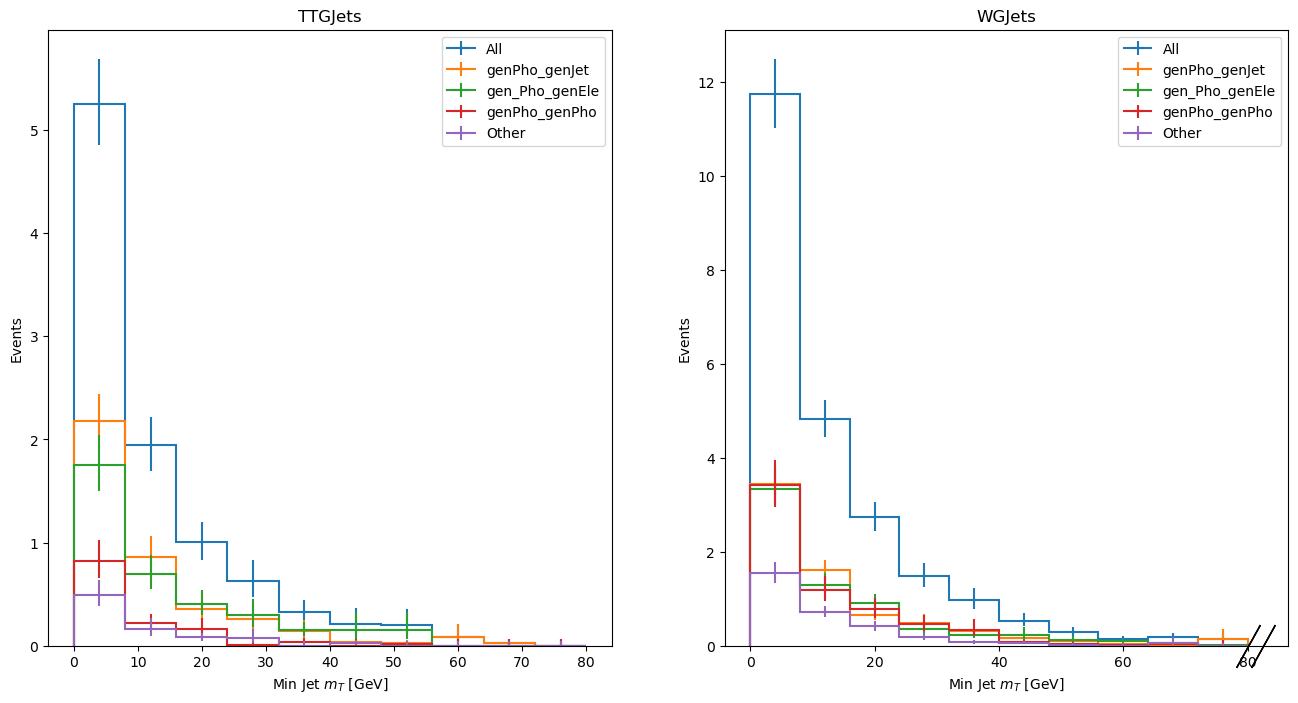

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
characterize_min_mt("TTGJets", fig=fig, ax=ax[0])
characterize_min_mt("WGJets", fig=fig, ax=ax[1])